In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = 8, 5

#### 데이터 읽기
- 데이터 명세서가 없음.
- 변수를 유추해 볼 필요가 있음.
- 데이터에 대한 자료가 너무 없어 모델링 작업으로까지는 진행하지 못함.

In [2]:
drink = pd.read_csv('data/drink.csv')
drink.head(20)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [3]:
# 데이터 정보 확인.
drink.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [4]:
# 데이터 기술 통계량.
drink.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


#### 상관관계

In [5]:
# beer_servings와 wine_servings 두 특성간의 상관계수를 계산.
# pearson은 상관계수를 계산하는 함수.
corr = drink[['beer_servings', 'wine_servings']].corr(method = 'pearson')
corr

,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


In [6]:
# 여러 피처의 상관관계 분석.
cols = ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']
corr = drink[cols].corr(method='pearson')
corr

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


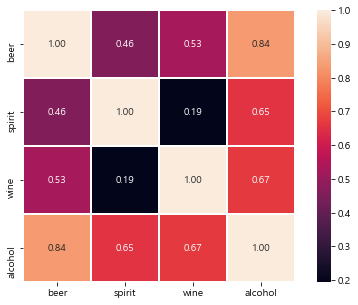

In [7]:
# Heat map.
# wine & spirit 는 거의 무상관으로 봐도 없어보임.
cols_view = ['beer' ,'spirit', 'wine', 'alcohol']
hm = sb.heatmap(corr.values, cbar=True, annot=True, square=True, linewidths=0.4, 
                fmt='.2f', yticklabels=cols_view, xticklabels=cols_view)
plt.show()

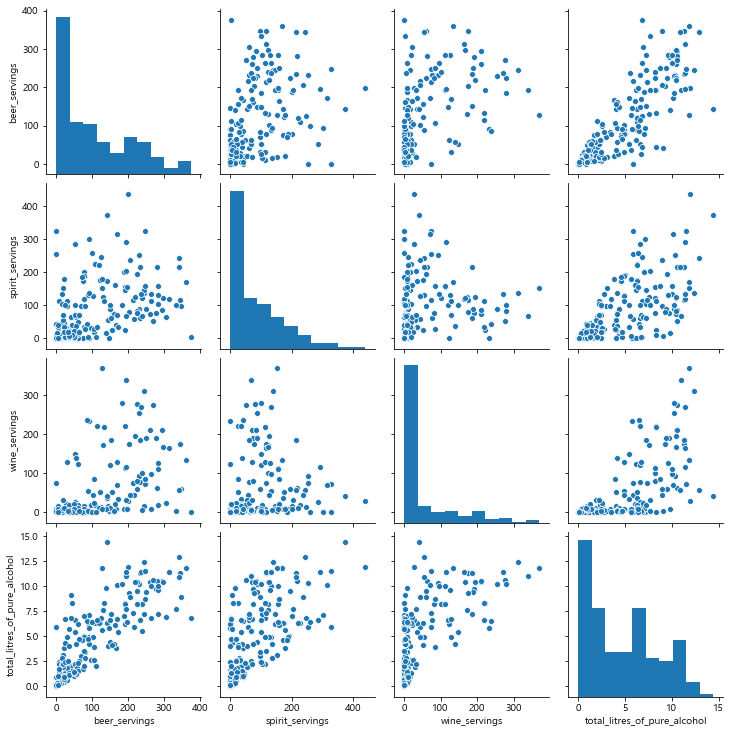

In [8]:
# 시각화 라이브러리를 이용한 피처간의 scatter.
# 각 컬럼의 데이터의 정규성은 만족해 보이지 않음.
# 기계학습 방법이 아닌 가설 검정 및 수학적 검정 방식에서는 데이터의 변환이 필요해 보임.
sb.pairplot(drink[cols])
plt.show()

#### 결측치 처리

In [9]:
# 결측치 확인.
drink.isna().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [10]:
# NaN가 결측이 아닌. 북아메리카를 의미함. 결측 처리시 주의 요함.
# NA로 변환.
drink['continent'] = drink['continent'].fillna('NA')

In [11]:
# 북아메리카(NA)가 23개를 의미하는 것이고 결측을 뜻하는 것이 아니므로 결측이 없다고 판단.
drink[ drink['continent'] == 'NA' ]['continent'].count()

23

#### 대륙별 비율을 확인

In [12]:
# 대륙 이름들 리스트 출력.
labels = drink['continent'].value_counts().index.tolist()
labels

['AF', 'EU', 'AS', 'NA', 'OC', 'SA']

In [13]:
# 대륙별 국가 수.
fraces = drink['continent'].value_counts().values.tolist()
fraces

[53, 45, 44, 23, 16, 12]

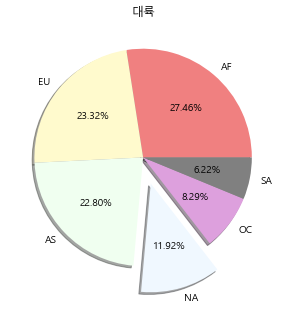

In [14]:
# Pie 차트.
col = ['lightcoral','lemonchiffon', 'honeydew', 'aliceblue', 'plum', 'grey']
explode = 0, 0, 0, 0.25, 0, 0
plt.pie(fraces, labels=labels, autopct='%.2f%%', shadow=True, explode=explode, colors=col)
plt.title('대륙')
plt.show()

#### 대륙별 spirit_servings의 평균, 최소, 최대, 합계를 계산.

In [15]:
a = drink.groupby('continent')['spirit_servings']
result = a.agg(['mean', 'min', 'max', 'sum'])
result

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
NA,165.739130,68,438,3812
OC,58.437500,0,254,935
SA,114.750000,25,302,1377


#### 전체 평균보다 많은 알콜을 섭취하는 대륙만을 가져옴

In [16]:
# 알콜 섭취량의 평균.
total_mean = drink['total_litres_of_pure_alcohol'].mean()
print(f'알콜 섭취량의 평균 : {round(total_mean, 3)}')

알콜 섭취량의 평균 : 4.717


In [17]:
# 대륙별 알콜 섭취 평균.
a = drink.groupby('continent')['total_litres_of_pure_alcohol']
continent_mean = a.mean()
continent_mean

continent
AF    3.007547
AS    2.170455
EU    8.617778
NA    5.995652
OC    3.381250
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [18]:
# 전체 평균보다 높은 대륙만을 출력.
a = continent_mean >= total_mean
continent_over_mean = continent_mean[a]
continent_over_mean

continent
EU    8.617778
NA    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

#### 평균 beer_servings가 가장 높은 대륙을 구하기

In [19]:
a1 = drink.groupby('continent')
a2 = a1['beer_servings'].mean()
# 값이 가장큰 로우의 인덱스를 가져온다.
beer_continent = a2.idxmax()
beer_continent

'EU'

#### 위에서 구한 대륙별 spirit_servings의 평균, 최소, 최대, 합계의 시각화

In [20]:
# 대륙의 수 : 6 대륙.
n_groups = len(result)

# 각 결과를 따로 추출.
means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()

print(means)
print(mins)
print(maxs)
print(sums)

[16.339622641509433, 60.84090909090909, 132.55555555555554, 165.7391304347826, 58.4375, 114.75]
[0, 0, 0, 68, 0, 25]
[152, 326, 373, 438, 254, 302]
[866, 2677, 5965, 3812, 935, 1377]


In [21]:
# 그래프 인덱스 번호.
index = np.arange(n_groups)
index

array([0, 1, 2, 3, 4, 5])

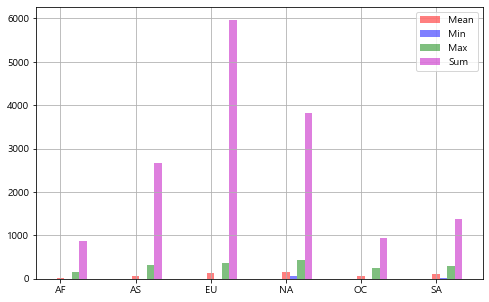

In [22]:
# 그래프 바의 가로 길이.
bar_width = 0.1

plt.bar(index, means, bar_width, color='r', label='Mean', alpha=.5)
plt.bar(index + bar_width, mins, bar_width, color='b', label='Min', alpha=.5)
plt.bar(index + (bar_width * 2), maxs, bar_width, color='g', label='Max', alpha=.5)
plt.bar(index + (bar_width * 3), sums, bar_width, color='m', label='Sum', alpha=.5)
plt.legend()
plt.grid()
plt.xticks(index, result.index.tolist())
plt.show()

#### 대륙별 total_liters_of_pure_alcohol을 시각화.

In [23]:
# 대륙별 평균에서 대륙 이름 출력.
continents = continent_mean.index.tolist()

# 대륙이 이름에 평균을 추가.
continents.append('mean')
print(continents)

# x 축 위치.
x_pos = np.arange(len(continents))
print(x_pos)

['AF', 'AS', 'EU', 'NA', 'OC', 'SA', 'mean']
[0 1 2 3 4 5 6]


In [24]:
# 알콜 값.
alcohol = continent_mean.tolist()
alcohol.append(total_mean)
alcohol

[3.00754716981132,
 2.1704545454545454,
 8.617777777777777,
 5.995652173913044,
 3.3812500000000005,
 6.308333333333334,
 4.717098445595855]

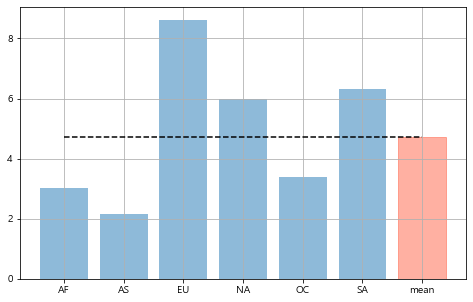

In [25]:
bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5)

# 마지막(전체 평균)은 붉은색으로 변경.
bar_list[-1].set_color('tomato')

# x축 이름을 대륙의 이름으로 설정.
plt.xticks(x_pos, continents)

# 평균 위치에 선을 그림.
plt.plot([0, 6], [total_mean, total_mean], 'k--')
plt.grid()
plt.show()

#### 대륙별 beer_servings를 시각화

In [26]:
# 각 대륙별 맥주 소비량 평균.
beer_group = drink.groupby('continent')['beer_servings'].mean()
beer_group

continent
AF     61.471698
AS     37.045455
EU    193.777778
NA    145.434783
OC     89.687500
SA    175.083333
Name: beer_servings, dtype: float64

In [27]:
# 맥주 판매량이 가장 높은 국가 이름
beer_continent

'EU'

In [28]:
# 각 대륙이 이름을 가져오기.
continents = beer_group.index.tolist()
continents

['AF', 'AS', 'EU', 'NA', 'OC', 'SA']

In [29]:
# 막대 그래프 인덱스.
x_pos = np.arange(len(continents))
x_pos

array([0, 1, 2, 3, 4, 5])

In [30]:
# 알콜량 계산.
alcohol = beer_group.tolist()
alcohol

[61.471698113207545,
 37.04545454545455,
 193.77777777777777,
 145.43478260869566,
 89.6875,
 175.08333333333334]

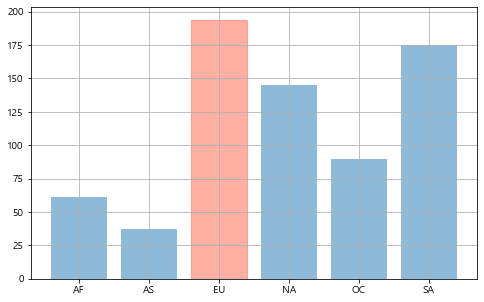

In [31]:
bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5)

# 가장 많은 국가를 붉은색으로 표시.
bar_list[continents.index(beer_continent)].set_color('tomato')

# X 축에 국가를 표시.
plt.xticks(x_pos, continents)
plt.grid()
plt.show()

#### 한국인은 얼마나 독하게 술을 먹는가

In [32]:
# 전체 소비량.
total_servings = drink['beer_servings'] + drink['wine_servings'] + drink['spirit_servings']
total_servings

0        0
1      275
2       39
3      695
4      319
      ... 
188    436
189    114
190      6
191     55
192     86
Length: 193, dtype: int64

In [33]:
drink['total_servings'] = total_servings
drink.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,275
2,Algeria,25,0,14,0.7,AF,39
3,Andorra,245,138,312,12.4,EU,695
4,Angola,217,57,45,5.9,AF,319
5,Antigua & Barbuda,102,128,45,4.9,NA,275
6,Argentina,193,25,221,8.3,SA,439
7,Armenia,21,179,11,3.8,EU,211
8,Australia,261,72,212,10.4,OC,545
9,Austria,279,75,191,9.7,EU,545


In [34]:
# 술 소비량 대비 알콜 비율특성을 생성.
a = drink['total_litres_of_pure_alcohol'] / drink['total_servings']

# 결측치를 0으로 채워줌.
a.fillna(0, inplace=True)
drink['alcohol_rate'] = a
drink.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
0,Afghanistan,0,0,0,0.0,AS,0,0.000000
1,Albania,89,132,54,4.9,EU,275,0.017818
2,Algeria,25,0,14,0.7,AF,39,0.017949
3,Andorra,245,138,312,12.4,EU,695,0.017842
4,Angola,217,57,45,5.9,AF,319,0.018495
5,Antigua & Barbuda,102,128,45,4.9,NA,275,0.017818
6,Argentina,193,25,221,8.3,SA,439,0.018907
7,Armenia,21,179,11,3.8,EU,211,0.018009
8,Australia,261,72,212,10.4,OC,545,0.019083
9,Austria,279,75,191,9.7,EU,545,0.017798


In [35]:
# 국가와 알콜 비율을 추출.
country_with_rank = drink[['country', 'alcohol_rate']]
country_with_rank.head()

,country,alcohol_rate
0,Afghanistan,0.000000
1,Albania,0.017818
2,Algeria,0.017949
3,Andorra,0.017842
4,Angola,0.018495


In [36]:
# alchol_rate를 기준으로 내림차순 정렬.
country_with_rank.sort_values(by='alcohol_rate', ascending=False, inplace=True)
country_with_rank.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111


In [37]:
# 국가별 순위 정보를 그래프.
# 국가 목록을 가져오기.
country_list = country_with_rank['country'].tolist()
print(country_list)

['Gambia', 'Sierra Leone', 'Nigeria', 'Uganda', 'Rwanda', 'Tanzania', 'Burkina Faso', 'Central African Republic', "Cote d'Ivoire", 'Mali', 'Sudan', 'Malawi', 'Burundi', 'DR Congo', 'South Korea', 'Zimbabwe', 'Swaziland', 'Zambia', 'Ghana', 'Cameroon', 'Laos', 'Guinea-Bissau', 'Ethiopia', 'Eritrea', 'Belarus', 'Lesotho', 'Japan', 'Chad', 'Togo', 'Botswana', 'Kenya', 'Benin', 'South Africa', 'New Zealand', 'Finland', 'Lithuania', 'Comoros', 'Saudi Arabia', 'Estonia', 'Congo', 'United Kingdom', 'Ireland', 'Australia', 'Argentina', 'Slovakia', 'Latvia', 'Mozambique', 'Cabo Verde', 'Angola', 'Sri Lanka', 'Portugal', 'Ukraine', 'France', 'Guinea', 'Egypt', 'Nepal', 'Norway', 'St. Lucia', 'Dominica', 'Sweden', 'Jamaica', 'Spain', 'Singapore', 'Paraguay', 'Azerbaijan', 'Switzerland', 'Bahamas', 'Turkmenistan', 'Armenia', 'Vanuatu', 'Qatar', 'Haiti', 'Cook Islands', 'Montenegro', 'Sao Tome & Principe', 'Oman', 'Algeria', 'United Arab Emirates', 'Georgia', 'Guyana', 'Greece', 'Lebanon', 'China',

In [38]:
# x축으로 사용할 인덱스.
x_pos = np.arange(len(country_list))
x_pos

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [39]:
# y축에 사용할 값들.
rank = country_with_rank['alcohol_rate'].tolist()
print(rank)

[0.26666666666666666, 0.22333333333333333, 0.18571428571428572, 0.1537037037037037, 0.1511111111111111, 0.1325581395348837, 0.11025641025641025, 0.09, 0.08888888888888889, 0.08571428571428572, 0.08095238095238096, 0.075, 0.0715909090909091, 0.06388888888888888, 0.0593939393939394, 0.05465116279069768, 0.05, 0.045454545454545456, 0.04090909090909091, 0.038157894736842106, 0.03351351351351351, 0.03125, 0.03043478260869565, 0.027777777777777776, 0.02585278276481149, 0.025225225225225224, 0.023728813559322035, 0.023529411764705882, 0.02280701754385965, 0.022222222222222223, 0.021951219512195124, 0.021568627450980395, 0.021465968586387434, 0.020350109409190374, 0.02028397565922921, 0.02006220839813375, 0.02, 0.02, 0.019916142557651992, 0.019767441860465116, 0.01925925925925926, 0.01912751677852349, 0.01908256880733945, 0.018906605922551254, 0.01884297520661157, 0.018783542039355994, 0.018571428571428572, 0.018518518518518517, 0.018495297805642633, 0.018333333333333333, 0.018333333333333333,

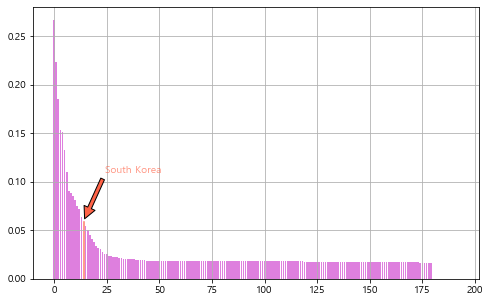

In [40]:
bar_list = plt.bar(x_pos, rank, color='m', alpha=.5)

# 한국은 붉은 계열색으로 표시.
bar_list[country_list.index('South Korea')].set_color('tomato')

# 한국에 표시.
# 한국의 막대 인덱스를 가져오기.(X 위치)
korea_rank = country_list.index('South Korea')

# 한국 알콜 수치(Y 위치)
a = country_with_rank[country_with_rank['country'] == 'South Korea']
korea_alc_rate = a['alcohol_rate'].values[0]
# print(korea_alc_rate)

plt.annotate('South Korea', color='tomato', alpha=.7, xy=(korea_rank, korea_alc_rate),
             xytext=(korea_rank + 10, korea_alc_rate + 0.05),
            arrowprops = dict(facecolor='tomato', shrink=0.05))
plt.grid()
plt.show()